In [1]:
from TermsExtraction import main as termExtraction
from TermsExtractionCoreRelated import main as termCoreRelatedWindow
from TermsExtractionDepRelated import  main as termAncestorExtraction
from CorpusParsing import main as corpusParsing
from termsLabelling import computeIrrelevantFrequency, main as autoLabelling
from window_based_matrix_creation import main as windowGeneration
from subject_verb_based_matrix_creation import main as SVmatrixCreation
from SGD import main as exeSGD
from LDAClustering import main as LDAclustering
from common_functions import cartesian
from matrix_sparsity import  main as matrixSparcity
import matplotlib.pyplot as plt
import numpy as np

In [9]:
minFreqToTest = [i for i in range(5, 50, 5)]
irrTermsFreq = []
nbrOfRelevantTermsGenerated = []
for minFreq in minFreqToTest:
    termExtraction(minFreq, 0.1)
    WMT_label, totalWords, irrelevantTerms = computeIrrelevantFrequency("./OutputDir/ExtractedTerms.txt")
    irrTermsFreq.append(irrelevantTerms/totalWords)
    nbrOfRelevantTermsGenerated.append(totalWords-irrelevantTerms)

Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction


In [14]:
def plotCurves(data, labels, xlabel="", ylabel="", title=""):
    for i, XY in enumerate(data):
        plt.plot(XY[0], XY[1], label=labels[i])
    showPlotWithLabels(xlabel, ylabel, title)
def showPlotWithLabels(xlabel="", ylabel="", title=""):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

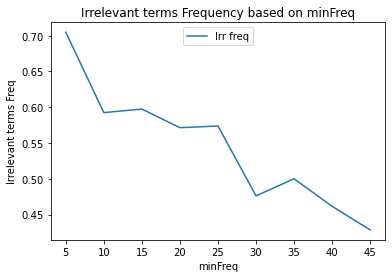

In [18]:
plotCurves([(minFreqToTest, irrTermsFreq)], ["Irr freq"], xlabel="minFreq", ylabel="Irrelevant terms Freq", title="Irrelevant terms Frequency based on minFreq")

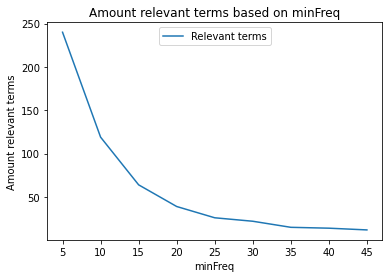

In [19]:
plotCurves([(minFreqToTest, nbrOfRelevantTermsGenerated)], ["Relevant terms"], xlabel="minFreq", 
           ylabel="Amount relevant terms", title="Amount relevant terms based on minFreq")

In [20]:
[irrTermsFreq[i]*nbrOfRelevantTermsGenerated[i] for i in range(len(irrTermsFreq))]

[169.15129151291512,
 70.50342465753425,
 38.23899371069182,
 22.285714285714285,
 14.918032786885245,
 10.476190476190476,
 7.5,
 6.461538461538462,
 5.142857142857142]

In [4]:
dataPropToTest = np.linspace(0.1,0.5,5)
resultsFreq = [[], [], []]
for dataProp in dataPropToTest:
    termExtraction(45, dataProp)
    WMT_label, totalWords, irrelevantTerms = computeIrrelevantFrequency("./OutputDir/ExtractedTerms.txt")
    resultsFreq[0].append(irrelevantTerms/totalWords)
    termCoreRelatedWindow(5, window=1, proportionData=dataProp)
    WMT_label, totalWords, irrelevantTerms = computeIrrelevantFrequency("./OutputDir/ExtractedTerms.txt")
    resultsFreq[1].append(irrelevantTerms/totalWords)
    termAncestorExtraction(5, dataProp)
    WMT_label, totalWords, irrelevantTerms = computeIrrelevantFrequency("./OutputDir/ExtractedTerms.txt")
    resultsFreq[2].append(irrelevantTerms/totalWords)

Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction
Starting term extraction
Finish term extraction


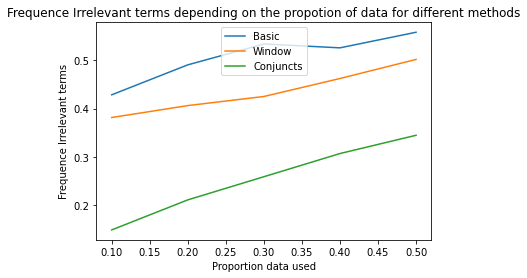

In [7]:
dataToPlot = [(dataPropToTest, result) for result in resultsFreq]
plotCurves(dataToPlot, ["Basic", "Window", "Conjuncts"], xlabel="Proportion data used", ylabel="Frequence Irrelevant terms", title="Frequence Irrelevant terms depending on the propotion of data for different methods")

In [17]:
termAncestorExtraction(8, 1)
WMT_label, totalWords, irrelevantTerms = computeIrrelevantFrequency("./OutputDir/ExtractedTerms.txt")
print(totalWords)
print(irrelevantTerms)
print(irrelevantTerms/totalWords)

Starting term extraction
Finish term extraction
344
86
0.25


In [3]:
windowSizeToTest = [i for i in range(1, 15)]
irrTermsFraq = [[], []]
numberOfTermsGene = [[], []]
accur = [[], []]
homog = [[], []]
for windowSize in windowSizeToTest:
    print("Window size " + str(windowSize))
    windowGeneration(window_size=windowSize)
    irrelevantTerms, totalWords = autoLabelling()
    irrTermsFraq[0].append(irrelevantTerms)
    numberOfTermsGene[0].append(totalWords)
    accur[0].append(exeSGD())
    homog[0].append(LDAclustering())
    SVmatrixCreation(window_size=windowSize)
    irrelevantTerms, totalWords = autoLabelling()
    irrTermsFraq[1].append(irrelevantTerms)
    numberOfTermsGene[1].append(totalWords)
    accur[1].append(exeSGD())
    homog[1].append(LDAclustering())

Window size 1
Starting window based matrix creation
Processing corpus file ./OutputDir/processedTestCorpus.txt (1/1)...
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
too many values to unpack (expected 6)
too many values to unpack (expected 6)
too many values to unpack (expected 6)
too many values to unpack (expected 6)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not 

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration

cluster: 0 18
['video', 'rock', 'critics', 'guitar', 'style', 'vocals', 'bass', 'drums', 'genres', 'world', 'videos', 'hop', 'drum', 'styles', 'plays', 'rhythm', 'metal', 'big bands']
cluster: 1 58
['performance', 'music video', 'album', 'recording', 'singles', 'hits', 'tour', 'live album', 'cd', 'series', 'records', 'studio album', 'release', 'album version', 'releases', 'original songs', 'artist', 'debut album', 'concept album', 'albums', 'uk albums chart', 'japan', 'studio albums', 'second album', 'fourth album', 'ep', 'second studio album', 'fourth studio album', 'husband', 'eurovision song contest', 'recordings', 'soundtrack album', 'new songs', 'new album', 'reception', 'songbook', 'debut solo album', 'solo album', 'musical direction', 'live performance', 'sony music', 'live albums', 'compilation albums', 'best song', 'music videos', 'release date', 'title song', 'compilation album', 'pop songs', 'solo albums', 'instrumental version', 'bando da lua', 'cast albums', 'bandmates', '

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration

cluster: 0 55
['video', 'performance', 'group', 'critics', 'awards', 'country', 'world', 'videos', 'hall', 'singer', 'life', 'competition', 'arts', 'director', 'folk', 'artist', 'musician', 'writer', 'award', 'original song', 'actor', 'songwriter', 'house', 'composer', 'singers', 'live music', 'sacred music', 'festival', 'world music', 'songwriting', 'pianist', 'opera', 'producer', 'eurovision song contest', 'music hall', 'bandleader', 'music critics', 'arranger', 'musicianship', 'songwriters', 'music festival', 'instrumentalist', 'poet', 'spirituals', 'best song', 'musicologist', 'grove music online', 'best original song', 'musical director', 'allmusic', 'accompanying music video', 'central band', 'best album', 'bluegrass music', 'woodsongs']
cluster: 1 29
['song', 'music video', 'songs', 'singles', 'theme song', 'lyrics', 'r&b', 'boys', 'hop', 'original songs', 'poems', 'hymns', 'uk albums chart', 'leader', 'man', 'incidental music', 'interviews', 'popular songs', 'instrumentalists',

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration

cluster: 0 95
['music', 'performance', 'critics', 'style', 'art', 'musical style', 'musical', 'genres', 'music industry', 'dance', 'musical styles', 'styles', 'folk', 'culture', 'music genre', 'celtic music', 'compositions', 'traditional music', 'folk music', 'forms', 'form', 'folk songs', 'arabic music', 'composition', 'musicologists', 'house music', 'rhythms', 'composers', 'performers', 'performances', 'hindustani music', 'work', 'dance music', 'church music', 'hip hop music', 'barbershop music', 'dances', 'bulgarian wedding music', 'popular music', 'world music', 'contemporary music', 'new music', 'byzantine music', 'vocal music', 'poetry', 'musical composition', 'original music', 'country music', 'musical genre', 'music critics', 'music genres', 'instrumental music', 'music theory', 'classical music', 'popular songs', 'traditional songs', 'musical genres', 'western music', 'recorded music', 'improvisation', 'chamber music', 'folk song', 'indian classical music', 'musicianship', 'bi

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 107
['music', 'critics', 'country', 'style', 'lyrics', 'art', 'musical style', 'genre', 'musical', 'genres', 'music industry', 'dance', 'musical styles', 'styles', 'folk', 'culture', 'music genre', 'celtic music', 'compositions', 'musicians', 'traditional music', 'folk music', 'forms', 'form', 'folk songs', 'writer', 'arabic music', 'composition', 'musicologists', 'house music', 'poems', 'rhythms', 'composers', 'performers', 'performances', 'hindustani music', 'tunes', 'work', 'dance music', 'women', 'church music', 'fans', 'hip hop music', 'bounce music', 'barbershop music', 'dances', 'bulgarian wedding music', 'popular music', 'world music', 'contemporary music', 'new music', 'byzantine music', 'vocal music', 'poetry', 'musical composition', 'original music', 'influences', 'country music', 'musical genre', 'electronic music', 'music genres', 'instrumental music', 'classical music', 'traditional songs', 'musical genres', 'western music', 'recorded music', 'improvisation', '

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 75
['music', 'words', 'sheet music', 'style', 'lyrics', 'musical style', 'musical', 'dance', 'life', 'musical styles', 'styles', 'folk', 'compositions', 'instrumentation', 'folk music', 'forms', 'form', 'folk songs', 'arabic music', 'composition', 'sounds', 'musicologists', 'chants', 'poems', 'rhythms', 'composers', 'performers', 'musical instruments', 'hindustani music', 'tunes', 'hymns', 'work', 'dance music', 'women', 'barbershop music', 'dances', 'dancers', 'new music', 'byzantine music', 'vocal music', 'music theory', 'poetry', 'musical composition', 'original music', 'musical genre', 'instrumental music', 'classical music', 'popular songs', 'traditional songs', 'musical genres', 'western music', 'improvisation', 'folk song', 'indian classical music', 'american folk music', 'instrumental accompaniment', 'musical theater', 'instrumentals', 'background music', 'popular song', 'acoustic instruments', 'musical works', 'indian music', 'spirituals', 'work songs', 'traditional

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 136
['music', 'critics', 'words', 'plays', 'pop', 'country', 'sheet music', 'style', 'lyrics', 'art', 'jazz', 'musical style', 'genre', 'musical', 'genres', 'rock music', 'artists', 'music industry', 'pop music', 'dance', 'singing', 'musical styles', 'styles', 'folk', 'culture', 'music genre', 'celtic music', 'compositions', 'musicians', 'instrumentation', 'traditional music', 'folk music', 'forms', 'form', 'folk songs', 'musician', 'writer', 'arabic music', 'composition', 'sounds', 'groups', 'musicologists', 'house music', 'chants', 'poems', 'rhythms', 'composers', 'performers', 'musical instruments', 'hindustani music', 'tunes', 'hymns', 'work', 'dance music', 'women', 'church music', 'fans', 'blues', 'black music', 'hip hop music', 'subgenre', 'barbershop music', 'dances', 'bulgarian wedding music', 'dancers', 'popular music', 'world music', 'contemporary music', 'new music', 'jazz musicians', 'byzantine music', 'vocal music', 'music theory', 'poetry', 'musical compositio

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 111
['music', 'critics', 'words', 'plays', 'sheet music', 'style', 'lyrics', 'jazz', 'musical style', 'musical', 'genres', 'music industry', 'musical comedy', 'dance', 'singing', 'musical styles', 'styles', 'folk', 'culture', 'compositions', 'musicians', 'instrumentation', 'traditional music', 'folk music', 'forms', 'form', 'folk songs', 'writer', 'arabic music', 'composition', 'musicologists', 'house music', 'chants', 'poems', 'rhythms', 'composers', 'composer', 'performers', 'musical instruments', 'hindustani music', 'tunes', 'hymns', 'work', 'dance music', 'women', 'church music', 'hip hop music', 'barbershop music', 'dances', 'bulgarian wedding music', 'dancers', 'popular music', 'contemporary music', 'new music', 'byzantine music', 'vocal music', 'music theory', 'reception', 'poetry', 'musical composition', 'original music', 'musical genre', 'music critics', 'music genres', 'instrumental music', 'classical music', 'popular songs', 'traditional songs', 'musical genres', 

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 102
['music', 'critics', 'words', 'plays', 'style', 'lyrics', 'art', 'musical style', 'musical', 'dance', 'musical styles', 'styles', 'folk', 'culture', 'compositions', 'musicians', 'traditional music', 'folk music', 'forms', 'form', 'folk songs', 'musician', 'writer', 'arabic music', 'composition', 'musicologists', 'chants', 'poems', 'rhythms', 'composers', 'composer', 'performers', 'musical instruments', 'hindustani music', 'tunes', 'hymns', 'work', 'dance music', 'women', 'church music', 'barbershop music', 'dances', 'bulgarian wedding music', 'dancers', 'popular music', 'contemporary music', 'new music', 'byzantine music', 'vocal music', 'music theory', 'reception', 'poetry', 'musical composition', 'original music', 'musical genre', 'music critics', 'music genres', 'instrumental music', 'classical music', 'popular songs', 'traditional songs', 'musical genres', 'western music', 'improvisation', 'chamber music', 'folk song', 'indian classical music', 'musical theatre', 'bi

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 22
['voice', 'guitar', 'instruments', 'sheet music', 'vocals', 'bass', 'drums', 'sound', 'instrumentation', 'traditional instruments', 'sounds', 'chants', 'piano', 'musical instruments', 'instrument', 'vocal music', 'improvisation', 'instrumental accompaniment', 'choral music', 'brass instruments', 'percussion instruments', 'acoustic instruments']
cluster: 1 42
['performance', 'awards', 'organ', 'production', 'hall', 'arts', 'director', 'orchestra', 'award', 'composer', 'opera', 'performances', 'festival', 'musicals', 'japan', 'symphony', 'choir', 'live music', 'church music', 'sacred music', 'international music score library project', 'musical director', 'music festival', 'contemporary music', 'musical career', 'pianist', 'music hall', 'incidental music', 'musical theatre', 'conductor', 'musical theater', 'music education', 'orchestras', 'marching band', 'music director', 'grove music online', 'best original song', 'film music', 'pipe band', 'central band', 'music directio

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 65
['rock', 'punk', 'guitar', 'instruments', 'style', 'vocals', 'bass', 'drums', 'sound', 'jazz', 'musical style', 'soul', 'r&b', 'genres', 'rock music', 'styles', 'bands', 'musicians', 'instrumentation', 'traditional instruments', 'arabic music', 'sounds', 'guitarist', 'groups', 'house music', 'rhythms', 'musical instruments', 'instrument', 'drummer', 'blues', 'soul music', 'subgenre', 'subgenres', 'jazz musicians', 'rhythm', 'metal', 'band members', 'influences', 'bandleader', 'music scene', 'wave', 'beat music', 'roll', 'rock bands', 'new band', 'improvisation', 'musicianship', 'big band', 'different genres', 'alternative music', 'industrial music', 'instrumentalists', 'instrumentalist', 'instrumentals', 'electronic dance music', 'brass instruments', 'percussion instruments', 'acoustic instruments', 'bhangra music', 'hardcore punk band', 'big bands', 'heavy metal music', 'experimental music', 'allmusic', 'boy bands']
cluster: 1 5
['corps', 'drum', 'competition', 'pipe ban

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 53
['rock', 'punk', 'guitar', 'instruments', 'sheet music', 'vocals', 'bass', 'drums', 'sound', 'jazz', 'soul', 'r&b', 'rock music', 'bands', 'instrumentation', 'traditional instruments', 'sounds', 'guitarist', 'groups', 'musical instruments', 'instrument', 'drummer', 'blues', 'soul music', 'subgenre', 'subgenres', 'jazz musicians', 'rhythm', 'metal', 'band members', 'bandleader', 'music scene', 'wave', 'beat music', 'roll', 'rock bands', 'new band', 'musicianship', 'big band', 'industrial music', 'instrumentalists', 'instrumentalist', 'instrumentals', 'brass instruments', 'percussion instruments', 'acoustic instruments', 'hardcore punk band', 'notable bands', 'big bands', 'heavy metal music', 'experimental music', 'allmusic', 'boy bands']
cluster: 1 4
['corps', 'drum', 'competition', 'pipe band']
cluster: 2 37
['video', 'song', 'music video', 'songs', 'words', 'theme song', 'lyrics', 'series', 'videos', 'singer', 'album version', 'life', 'writer', 'original song', 'songwrit

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 51
['rock', 'punk', 'guitar', 'instruments', 'sheet music', 'vocals', 'bass', 'drums', 'sound', 'jazz', 'soul', 'r&b', 'rock music', 'bands', 'instrumentation', 'traditional instruments', 'sounds', 'guitarist', 'groups', 'musical instruments', 'instrument', 'drummer', 'blues', 'soul music', 'subgenre', 'subgenres', 'jazz musicians', 'rhythm', 'metal', 'band members', 'bandleader', 'music scene', 'wave', 'beat music', 'roll', 'rock bands', 'new band', 'musicianship', 'big band', 'industrial music', 'instrumentalists', 'instrumentalist', 'brass instruments', 'percussion instruments', 'acoustic instruments', 'hardcore punk band', 'notable bands', 'big bands', 'heavy metal music', 'experimental music', 'boy bands']
cluster: 1 4
['corps', 'drum', 'competition', 'pipe band']
cluster: 2 41
['video', 'song', 'music video', 'songs', 'words', 'theme song', 'lyrics', 'series', 'videos', 'singer', 'album version', 'house', 'life', 'writer', 'original song', 'songwriter', 'poems', 'women

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cluster: 0 36
['guitar', 'instruments', 'sheet music', 'style', 'vocals', 'bass', 'drums', 'sound', 'jazz', 'instrumentation', 'traditional instruments', 'arabic music', 'sounds', 'guitarist', 'rhythms', 'piano', 'musical instruments', 'hindustani music', 'instrument', 'tunes', 'barbershop music', 'dancers', 'rhythm', 'bandleader', 'improvisation', 'indian classical music', 'musicianship', 'big band', 'instrumentalists', 'background music', 'brass instruments', 'percussion instruments', 'acoustic instruments', 'work songs', 'big bands', 'experimental music']
cluster: 1 4
['corps', 'drum', 'competition', 'pipe band']
cluster: 2 41
['video', 'song', 'music video', 'songs', 'words', 'theme song', 'lyrics', 'series', 'videos', 'singer', 'album version', 'dance', 'life', 'folk songs', 'writer', 'original song', 'songwriter', 'dances', 'husband', 'eurovision song contest', 'man', 'music critics', 'songbook', 'popular songs', 'pop songs', 'folk song', 'songwriters', 'popular song', 'best song

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6,

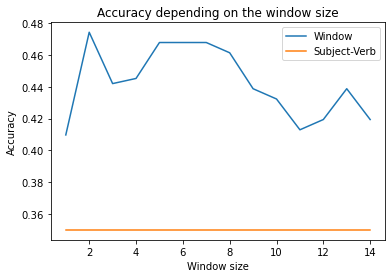

In [15]:
dataToPlot = [(windowSizeToTest, accuracies) for accuracies in accur]
plotCurves(dataToPlot, ["Window", "Subject-Verb"], xlabel="Window size", ylabel="Accuracy", title="Accuracy depending on the window size")

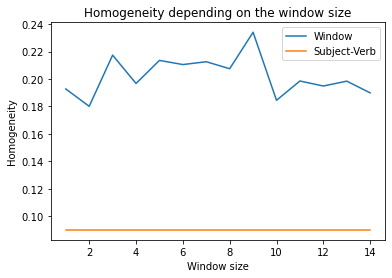

In [16]:
dataToPlot = [(windowSizeToTest, homogeneities) for homogeneities in homog]
plotCurves(dataToPlot, ["Window", "Subject-Verb"], xlabel="Window size", ylabel="Homogeneity", title="Homogeneity depending on the window size")

In [26]:
windowGeneration(window_size=2)
irrelevantTerms, totalWords = autoLabelling()

Starting window based matrix creation
Processing corpus file ./OutputDir/processedTestCorpus.txt (1/1)...
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
too many values to unpack (expected 6)
too many values to unpack (expected 6)
too many values to unpack (expected 6)
too many values to unpack (expected 6)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values to unpack (expected 6, got 3)
not enough values 

In [27]:
ET_label = {}
with open("./OutputDir/window_matrix_terms_labeled.txt", "r") as f:
    for line in f:
        if int(line.split(",")[1]) in ET_label:
            ET_label[int(line.split(",")[1])] += 1
        else:
            ET_label[int(line.split(",")[1])] = 1

In [28]:
ET_label

{4: 42, 0: 35, 1: 53, 2: 94, 5: 70, 3: 16}

# Models Experiments 

In [2]:
from SGD import runGridSearch, runSGDWithParams, plotConfusionMatrix
from sklearn.linear_model import SGDClassifier

In [3]:
bestEstimator = runGridSearch()
bestEstimator

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 207 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1658 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2048 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2430 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2928 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3378 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3976 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 4650 tasks      | el

SGDClassifier(alpha=0.01, max_iter=10, penalty='elasticnet', random_state=10)

In [7]:
sgd = SGDClassifier(alpha=0.01, max_iter=10, penalty='elasticnet', random_state=10)
runSGDWithParams(sgd)

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration

0.5290322580645161

In [9]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [10]:
runSGDWithParams(sgd, make_scorer(precision_score, average="micro"))

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration

0.5290322580645161

In [11]:
runSGDWithParams(sgd, make_scorer(recall_score, average="micro"))

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration

0.5290322580645161

/home/gat/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


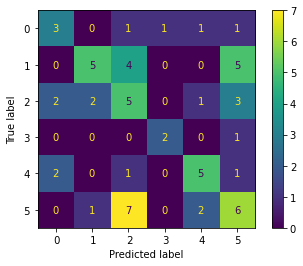

array([[3, 0, 1, 1, 1, 1],
       [0, 5, 4, 0, 0, 5],
       [2, 2, 5, 0, 1, 3],
       [0, 0, 0, 2, 0, 1],
       [2, 0, 1, 0, 5, 1],
       [0, 1, 7, 0, 2, 6]])

In [4]:
plotConfusionMatrix(sgd)

In [12]:
LDAclustering()

cluster: 0 55
['video', 'performance', 'group', 'critics', 'awards', 'country', 'world', 'videos', 'hall', 'singer', 'life', 'competition', 'arts', 'director', 'folk', 'artist', 'musician', 'writer', 'award', 'original song', 'actor', 'songwriter', 'house', 'composer', 'singers', 'live music', 'sacred music', 'festival', 'world music', 'songwriting', 'pianist', 'opera', 'producer', 'eurovision song contest', 'music hall', 'bandleader', 'music critics', 'arranger', 'musicianship', 'songwriters', 'music festival', 'instrumentalist', 'poet', 'spirituals', 'best song', 'musicologist', 'grove music online', 'best original song', 'musical director', 'allmusic', 'accompanying music video', 'central band', 'best album', 'bluegrass music', 'woodsongs']
cluster: 1 29
['song', 'music video', 'songs', 'singles', 'theme song', 'lyrics', 'r&b', 'boys', 'hop', 'original songs', 'poems', 'hymns', 'uk albums chart', 'leader', 'man', 'incidental music', 'interviews', 'popular songs', 'instrumentalists',

0.18008566683256452